In [1]:
import matplotlib
import pandas as pd
import numpy as np
import scipy.stats as si
import sympy as sy
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm
pd.options.display.max_columns = None
os.chdir('C:/Users/regru/Desktop/Springboard/Springboard_Project2')

In [2]:
#import dataset
df0 = pd.read_csv('telcom_churn.xls')

In [3]:
df0.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df = df0.drop(columns=['customerID','TotalCharges'])

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [6]:
#encode categorical vars
cat_features = df.columns[(df.columns != 'SeniorCitizen') & (df.columns != 'tenure') & (df.columns != 'MonthlyCharges') & (df.columns != 'TotalCharges')]
df_dummy = pd.get_dummies(df[cat_features],columns=cat_features,drop_first=True)
df_col_numeric = ['SeniorCitizen','tenure','MonthlyCharges']
df_mod = pd.concat([df_dummy,df[df_col_numeric]],axis=1)
df_mod.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,29.85
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,34,56.95
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,2,53.85
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,45,42.30
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,2,70.70


In [7]:
# Separate label and features
label = df_mod.Churn_Yes
features = df_mod.drop(columns=['Churn_Yes'])

In [8]:
# Split to training and test sets
from sklearn.model_selection import train_test_split
x, xt, ytrain, ytest = train_test_split(features.values,label.values,random_state=344)

C:\Users\regru\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


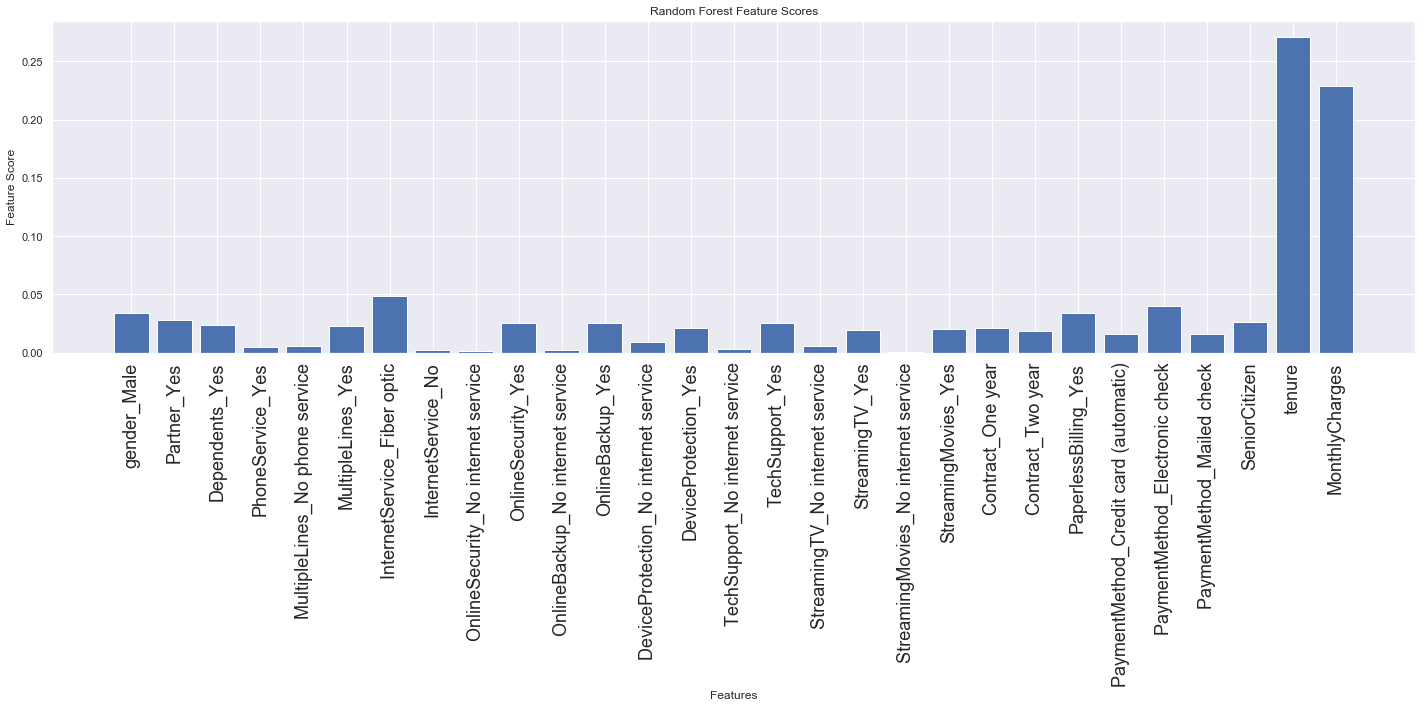

0.8001135718341851

In [9]:
# Fit model and view the most predictive features
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=684)
rf.fit(x,ytrain)
preds = rf.predict(xt)

#feature scores
feat_scores = rf.feature_importances_

# Plot the Random Forest scores
sns.set()
plt.figure(figsize=(20,10))
plt.rc('xtick',labelsize=18)
plt.bar(range(len(features.columns)), feat_scores)
plt.xticks(range(len(features.columns)), features, rotation='vertical')
plt.title('Random Forest Feature Scores')
plt.xlabel('Features')
plt.ylabel('Feature Score')
plt.tight_layout()
plt.savefig('Graphs/full_feature_scores.png')
plt.show()

# model accuracy
accuracy_score(ytest, preds)

In [10]:
# Tune model parameters
from sklearn.grid_search import GridSearchCV
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True, random_state=0) 

param_grid = { 
    'n_estimators': [150,200,250,300,350,400,500],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='roc_auc', cv= 5)
CV_rfc.fit(x, ytrain)
CV_rfc.best_params_

C:\Users\regru\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\regru\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'n_estimators': 250}

In [11]:
rf = RandomForestClassifier(n_jobs=-1,max_features= 'auto', max_depth=10, min_samples_leaf=4, oob_score = True, n_estimators=250, random_state=0)
rf.fit(x,ytrain)
rf_preds = rf.predict(xt)

# model accuracy
accuracy_score(ytest, rf_preds)

0.8097671777399205

In [12]:
# confusion matrix for randomforest
pd.crosstab(ytest, rf_preds, rownames=['Actual'], colnames=['Predicted'], margins=True,normalize='all')

Predicted,0,1,All
Actual,,,
0,0.687677,0.066440,0.754117
1,0.123793,0.122090,0.245883
All,0.811471,0.188529,1.000000


In [13]:
# confusion matrix for randomforest (counts)
pd.crosstab(ytest, rf_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1211,117,1328
1,218,215,433
All,1429,332,1761


In [14]:
# 5-fold cross validation using mean and stdev AUC value of ROC
def np_kfold_roc(clf, x, y,nfold=5):
    result = 0
    result_sq = 0
    for train, validation in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += roc_auc_score(y[validation], clf.predict_proba(x[validation])[:,1])# evaluate score function on held-out data
    avg_auroc = result/nfold 
    for train_1, validation_1 in KFold(nfold).split(x):
        clf.fit(x[train_1], y[train_1])
        result_sq += (roc_auc_score(y[validation_1], clf.predict_proba(x[validation_1])[:,1]) - avg_auroc)**2
    std_auroc = result_sq/nfold
    return (avg_auroc,np.sqrt(std_auroc))
np_kfold_roc(rf,x,ytrain)

(0.8391109072423717, 0.019323995427071285)

C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


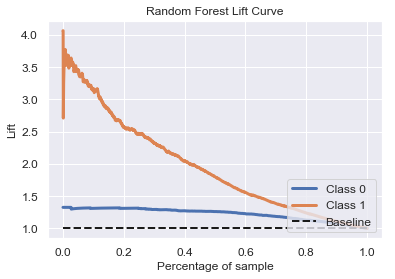

In [15]:
# Lift Graph
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_true=ytest, y_probas=rf.predict_proba(xt))
sns.set()
plt.title('Random Forest Lift Curve')
plt.savefig('Graphs/rf_lift_curve.png')
plt.show()

In [16]:
#xgboost
from xgboost import XGBClassifier
# fit model to training data
xg_mod = XGBClassifier()
xg_mod.fit(x, ytrain)
# make predictions for test data
xg_preds = xg_mod.predict(xt)
# evaluate predictions
accuracy_score(ytest, xg_preds)

C:\Users\regru\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8165814877910278

In [17]:
# confusion matrix
pd.crosstab(ytest, xg_preds, rownames=['Actual'], colnames=['Predicted'], margins=True, normalize='all')

Predicted,0,1,All
Actual,,,
0,0.687677,0.066440,0.754117
1,0.116979,0.128904,0.245883
All,0.804656,0.195344,1.000000


In [18]:
# confusion matrix
pd.crosstab(ytest, xg_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1211,117,1328
1,206,227,433
All,1417,344,1761


In [19]:
# 5-fold cross validation and AUC value of ROC
np_kfold_roc(xg_mod,x,ytrain)

(0.8403111081330692, 0.018557265776126812)

C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


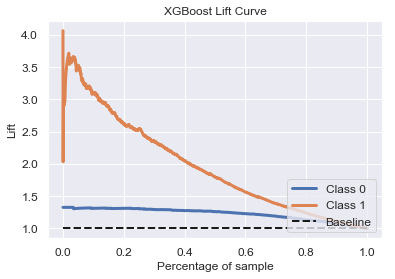

In [20]:
# Lift Graph
skplt.metrics.plot_lift_curve(y_true=ytest, y_probas=xg_mod.predict_proba(xt))
sns.set()
plt.title('XGBoost Lift Curve')
plt.savefig('Graphs/xgb_lift_curve.png')
plt.show()

In [21]:
#catboost
from catboost import CatBoostClassifier
catb_mod = CatBoostClassifier(silent=True)
#train the model
catb_mod.fit(x,ytrain)
# make the prediction using the resulting model
catb_preds = catb_mod.predict(xt)
#accuracy
accuracy_score(ytest, catb_preds)

0.8165814877910278

In [22]:
# confusion matrix
pd.crosstab(ytest, catb_preds, rownames=['Actual'], colnames=['Predicted'], margins=True, normalize='all')

Predicted,0.0,1.0,All
Actual,,,
0,0.688245,0.065872,0.754117
1,0.117547,0.128336,0.245883
All,0.805792,0.194208,1.000000


In [23]:
# confusion matrix
pd.crosstab(ytest, catb_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
Actual,,,
0,1212,116,1328
1,207,226,433
All,1419,342,1761


In [24]:
# 5-fold cross validation using mean and stdev AUC value of ROC
np_kfold_roc(catb_mod,x,ytrain) 

(0.8412979064075901, 0.018438464775412552)

C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


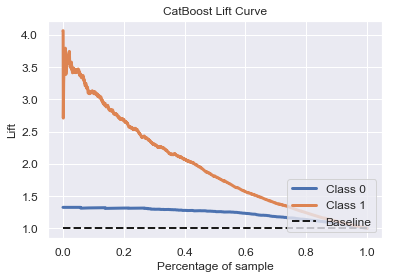

In [25]:
# Lift Graph
skplt.metrics.plot_lift_curve(y_true=ytest, y_probas=catb_mod.predict_proba(xt))
sns.set()
plt.title('CatBoost Lift Curve')
plt.savefig('Graphs/catb_lift_curve.png')
plt.show()

In [26]:
#logistic regression
from sklearn.linear_model import LogisticRegression
# fit model to training data
logreg = LogisticRegression()
logreg.fit(x,ytrain)
#make predictions on test data
logreg_preds = logreg.predict(xt)
#accuracy
accuracy_score(ytest, logreg_preds)

0.8091993185689949

In [27]:
# confusion matrix
pd.crosstab(ytest, logreg_preds, rownames=['Actual'], colnames=['Predicted'], margins=True, normalize='all')

Predicted,0,1,All
Actual,,,
0,0.678592,0.075525,0.754117
1,0.115275,0.130608,0.245883
All,0.793867,0.206133,1.000000


In [28]:
# confusion matrix
pd.crosstab(ytest, logreg_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1195,133,1328
1,203,230,433
All,1398,363,1761


In [29]:
# 5-fold cross validation using mean and stdev AUC value of ROC
np_kfold_roc(logreg,x,ytrain)

(0.8399533794590631, 0.018918935015463913)

C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


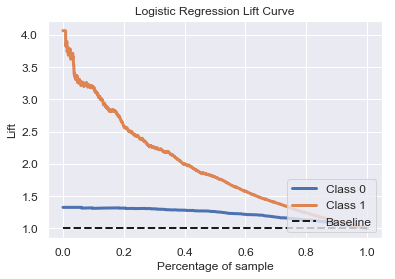

In [30]:
# Lift Graph
skplt.metrics.plot_lift_curve(y_true=ytest, y_probas=logreg.predict_proba(xt))
sns.set()
plt.title('Logistic Regression Lift Curve')
plt.savefig('Graphs/logreg_lift_curve.png')
plt.show()

In [31]:
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
clf1 = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt', oob_score = True, n_estimators=350, random_state=0)
clf2 = CatBoostClassifier(silent=True)
clf3 = XGBClassifier()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

sclf.fit(x,ytrain)
stacked_preds = sclf.predict(xt)
#accuracy
accuracy_score(ytest, stacked_preds)

0.7978421351504826

In [32]:
# confusion matrix
pd.crosstab(ytest, stacked_preds, rownames=['Actual'], colnames=['Predicted'], margins=True, normalize='all')

Predicted,0,1,All
Actual,,,
0,0.674049,0.080068,0.754117
1,0.122090,0.123793,0.245883
All,0.796139,0.203861,1.000000


In [33]:
# confusion matrix
pd.crosstab(ytest, stacked_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1187,141,1328
1,215,218,433
All,1402,359,1761


In [34]:
# 5-fold cross validation using mean and stdev AUC value of ROC
np_kfold_roc(sclf,x,ytrain)

(0.8073402554327632, 0.016912792237962087)

C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


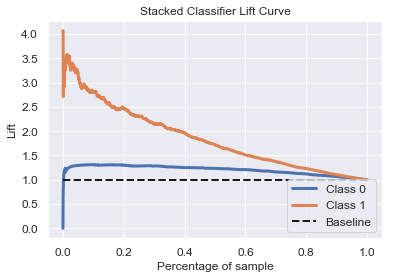

In [35]:
# Lift Graph
skplt.metrics.plot_lift_curve(y_true=ytest, y_probas=sclf.predict_proba(xt))
sns.set()
plt.title('Stacked Classifier Lift Curve')
plt.savefig('Graphs/sclf_lift_curve.png')
plt.show()

In [36]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(2,), random_state=1)
mlp.fit(x, ytrain)
mlnn_preds = mlp.predict(xt)
#accuracy
accuracy_score(ytest, mlnn_preds)

0.8137421919363997

In [37]:
# confusion matrix
pd.crosstab(ytest, mlnn_preds, rownames=['Actual'], colnames=['Predicted'], margins=True, normalize='all')

Predicted,0,1,All
Actual,,,
0,0.685406,0.068711,0.754117
1,0.117547,0.128336,0.245883
All,0.802953,0.197047,1.000000


In [38]:
# confusion matrix
pd.crosstab(ytest, logreg_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1195,133,1328
1,203,230,433
All,1398,363,1761


In [39]:
# 5-fold cross validation using mean and stdev AUC value of ROC
np_kfold_roc(mlp,x,ytrain)

(0.7664367693475945, 0.15288920318447502)

C:\Users\regru\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


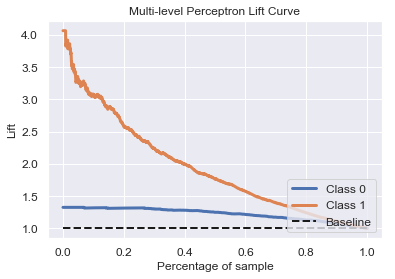

In [40]:
# Lift Graph
skplt.metrics.plot_lift_curve(y_true=ytest, y_probas=mlp.predict_proba(xt))
sns.set()
plt.title('Multi-level Perceptron Lift Curve')
plt.savefig('Graphs/mlp_lift_curve.png')
plt.show()

In [41]:
# Calculate ROC curve for each model
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(ytest, rf.predict_proba(xt)[:,1])
fpr2, tpr2, threshold2 = roc_curve(ytest, xg_mod.predict_proba(xt)[:,1])
fpr3, tpr3, threshold3 = roc_curve(ytest, catb_mod.predict_proba(xt)[:,1])
fpr4, tpr4, threshold4 = roc_curve(ytest, logreg.predict_proba(xt)[:,1])
fpr5, tpr5, threshold5 = roc_curve(ytest, mlp.predict_proba(xt)[:,1])
fpr6, tpr6, threshold6 = roc_curve(ytest, sclf.predict_proba(xt)[:,1])
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
roc_auc5 = auc(fpr5, tpr5)
roc_auc6 = auc(fpr6, tpr6)

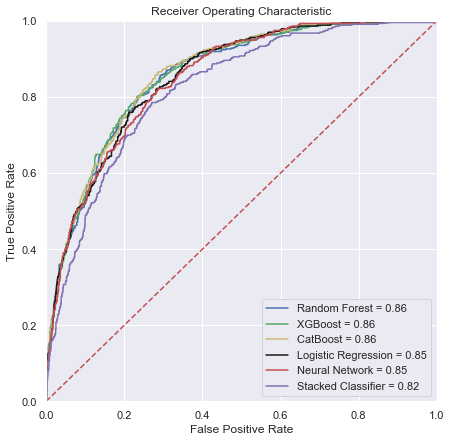

In [42]:
# Plot ROC curves
sns.set()
plt.rcParams["figure.figsize"] = (7,7)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'Random Forest = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'XGBoost = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'y', label = 'CatBoost = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'k', label = 'Logistic Regression = %0.2f' % roc_auc4)
plt.plot(fpr5, tpr5, 'r', label = 'Neural Network = %0.2f' % roc_auc5)
plt.plot(fpr6, tpr6, 'm', label = 'Stacked Classifier = %0.2f' % roc_auc6)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('Graphs/ROC Curves.png')
plt.show()

In [43]:
import six
def render_table(data,title='',ylabel='', col_width=4.0, row_height=0.625, font_size=16,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    plt.title(title,fontdict = {'fontsize' : font_size+2})
    plt.ylabel(ylabel)
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [44]:
# Store each confusion matrix
mlp_matrix = pd.crosstab(ytest, mlnn_preds, rownames=['Actual'], colnames=['Predicted'], normalize='all')
logreg_matrix = pd.crosstab(ytest, logreg_preds, rownames=['Actual'], colnames=['Predicted'], normalize='all')
xgb_matrix = pd.crosstab(ytest, stacked_preds, rownames=['Actual'], colnames=['Predicted'], normalize='all')
catb_matrix = pd.crosstab(ytest, catb_preds, rownames=['Actual'], colnames=['Predicted'], normalize='all')
rf_matrix = pd.crosstab(ytest, rf_preds, rownames=['Actual'], colnames=['Predicted'], normalize='all')
sclf_matrix = pd.crosstab(ytest, stacked_preds, rownames=['Actual'], colnames=['Predicted'], normalize='all')
# Add a column showing actual label
r_names = pd.DataFrame({'Actual':[0,1]})
# concatenate actual label to each confusion matrix
mlp_mat = round(pd.concat([r_names,mlp_matrix],axis=1),4)
logreg_mat = round(pd.concat([r_names,logreg_matrix],axis=1),4)
xgb_mat = round(pd.concat([r_names,xgb_matrix],axis=1),4)
catb_mat = round(pd.concat([r_names,catb_matrix],axis=1),4)
rf_mat = round(pd.concat([r_names,rf_matrix],axis=1),4)
sclf_mat = round(pd.concat([r_names,sclf_matrix],axis=1),4)

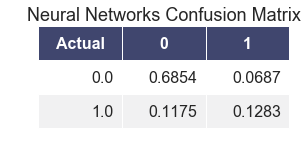

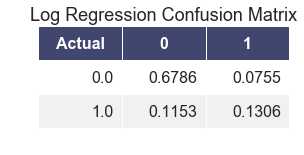

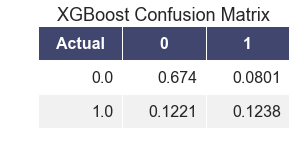

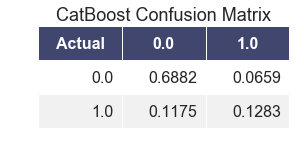

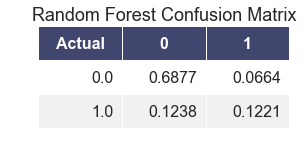

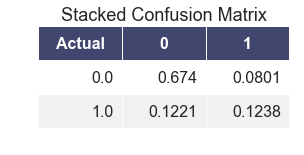

In [45]:
# Create tables for each matrix
render_table(mlp_mat,title='Neural Networks Confusion Matrix', col_width=1.5)
render_table(logreg_mat,title='Log Regression Confusion Matrix', col_width=1.5)
render_table(xgb_mat,title='XGBoost Confusion Matrix', col_width=1.5)
render_table(catb_mat,title='CatBoost Confusion Matrix', col_width=1.5)
render_table(rf_mat,title='Random Forest Confusion Matrix', col_width=1.5)
render_table(sclf_mat,title='Stacked Confusion Matrix', col_width=1.5)

In [46]:
# Store each confusion matrix
mlp_matrix_c = pd.crosstab(ytest, mlnn_preds, rownames=['Actual'], colnames=['Predicted'])
logreg_matrix_c = pd.crosstab(ytest, logreg_preds, rownames=['Actual'], colnames=['Predicted'])
xgb_matrix_c = pd.crosstab(ytest, stacked_preds, rownames=['Actual'], colnames=['Predicted'])
catb_matrix_c = pd.crosstab(ytest, catb_preds, rownames=['Actual'], colnames=['Predicted'])
rf_matrix_c = pd.crosstab(ytest, rf_preds, rownames=['Actual'], colnames=['Predicted'])
sclf_matrix_c = pd.crosstab(ytest, stacked_preds, rownames=['Actual'], colnames=['Predicted'])
# Add a column showing actual label
r_names = pd.DataFrame({'Actual':[0,1]})
# concatenate actual label to each confusion matrix
mlp_mat_c = round(pd.concat([r_names,mlp_matrix_c],axis=1),4)
logreg_mat_c = round(pd.concat([r_names,logreg_matrix_c],axis=1),4)
xgb_mat_c = round(pd.concat([r_names,xgb_matrix_c],axis=1),4)
catb_mat_c = round(pd.concat([r_names,catb_matrix_c],axis=1),4)
rf_mat_c = round(pd.concat([r_names,rf_matrix_c],axis=1),4)
sclf_mat_c = round(pd.concat([r_names,sclf_matrix_c],axis=1),4)

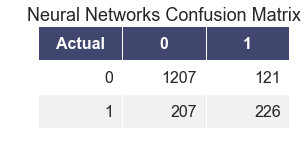

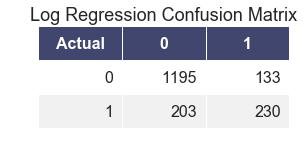

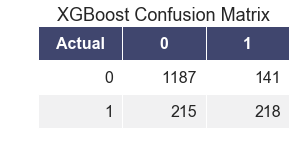

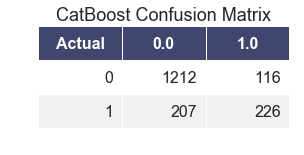

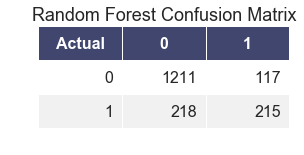

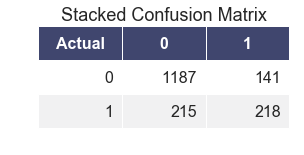

In [47]:
# Create tables for each matrix
render_table(mlp_mat_c,title='Neural Networks Confusion Matrix', col_width=1.5)
render_table(logreg_mat_c,title='Log Regression Confusion Matrix', col_width=1.5)
render_table(xgb_mat_c,title='XGBoost Confusion Matrix', col_width=1.5)
render_table(catb_mat_c,title='CatBoost Confusion Matrix', col_width=1.5)
render_table(rf_mat_c,title='Random Forest Confusion Matrix', col_width=1.5)
render_table(sclf_mat_c,title='Stacked Confusion Matrix', col_width=1.5)

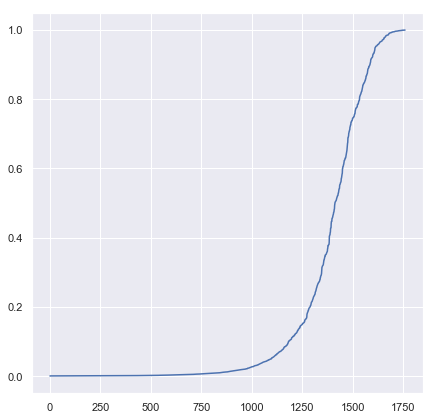

In [48]:
plt.plot(sorted(sclf.predict_proba(xt)[:,1]))
plt.show()

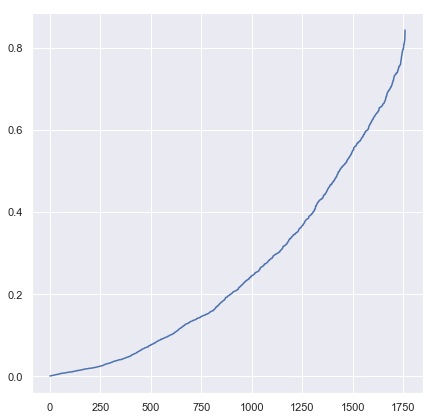

In [49]:
plt.plot(sorted(rf.predict_proba(xt)[:,1]))
plt.show()

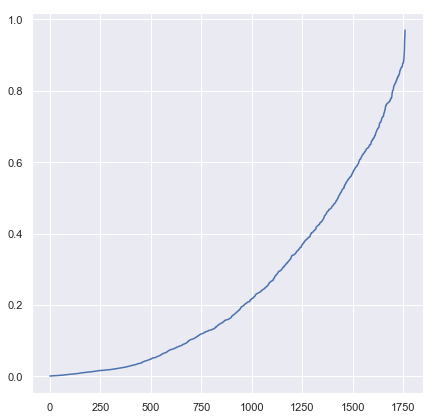

In [50]:
plt.plot(sorted(catb_mod.predict_proba(xt)[:,1]))
plt.show()